---
# <div align="center"><font color='green'> COSC 2673/2793 | Machine Learning  </font></div>
## <div align="center"> <font color='green'> **Example: Week03 Lecture QandA**</font></div>
---

Demo code for week 03 Lecture QandA.

**Disclaimer:** The code is done quickly to demonstrate some important concepts in logistic regression and regularisation and, should not be considered as an adequate approach to solve the tasks mentioned.

First lets use the IRIS dataset to understand logistic regression. This is perhaps the best known database to be found in the pattern recognition literature. The task is to predict the class of iris plant using the features of its flowers.   
<img src="Large53.jpeg">

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: 0 - Iris Setosa, 1 - Iris Versicolour, 2 - Iris Virginica

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

iris = datasets.load_iris()

data = pd.DataFrame(iris.data,columns= iris.feature_names)
data['target'] = iris.target

**I am not going to separate test data for this example. Note that this is extremely undesirable for ML. However, it is not useful here as this is just an example**

Some data visualisation. 

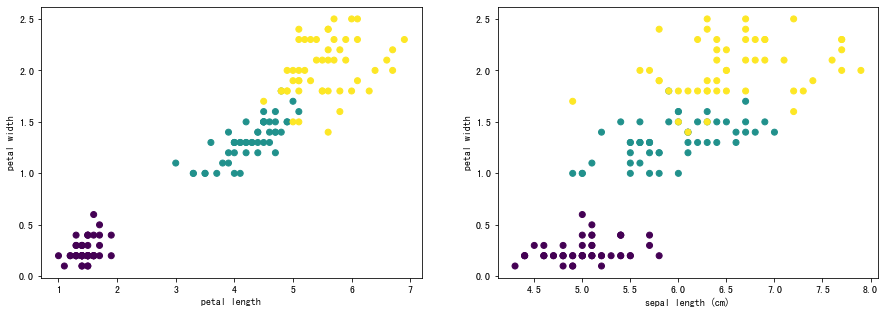

In [2]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(data['petal length (cm)'].to_numpy(), data['petal width (cm)'], c=data['target'])
plt.xlabel('petal length')
plt.ylabel('petal width')


plt.subplot(1,2,2)
plt.scatter(data['sepal length (cm)'].to_numpy(), data['petal width (cm)'], c=data['target'])
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width')


# plt.subplot(1,2,2)
# plt.scatter(data['petal length (cm)'].to_numpy(), data['sepal length (cm)'], c=data['target'])
# plt.xlabel('petal length (cm)')
# plt.ylabel('sepal length (cm)')


plt.show()

## Univariate logistic regression with attribute `petal length (cm)`

First lets do binary classification where the task is to **predict if a flower is from Iris Virginica or not using petal length (cm)**.

In [ ]:
y = data['target'] == 2
X = data['petal length (cm)'].to_numpy()

plot data

In [ ]:
plt.scatter(X, y, c=y)
plt.xlabel('petal length')
plt.ylabel('IRIS Type')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X.reshape(-1, 1), y)

In [ ]:
x = np.linspace(0,7,100)
y_prob = clf.predict_proba(x.reshape(-1, 1))
y_class = clf.predict(x.reshape(-1, 1))

plt.scatter(X, y, c=y)
plt.xlabel('petal length')
plt.ylabel('IRIS Type')

plt.plot(x, y_prob[:,1], 'r--')
# plt.plot(x, y_class, 'b-')
plt.show()

## Multivariate logistic regression with attribute `sepal length (cm)` and `petal width (cm)`

In [ ]:
y = data['target'] == 2
X = data[['sepal length (cm)','petal width (cm)']].to_numpy()

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.xlim(X[:,0].min(), X[:,0].max())
plt.ylim(X[:,1].min(), X[:,1].max())
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
clf = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000).fit(X, y)

In [ ]:
# create a mesh to plot in
def plot_decision_boundary(clf, poly=None):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    plt.subplot(1, 1,  1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    if poly != None:
        XX = np.c_[xx.ravel(), yy.ravel()]
        XX_poly = poly.transform(XX)
        Z = clf.predict(XX_poly)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [ ]:
plot_decision_boundary(clf)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(4)
poly.fit(X)
X_poly = poly.transform(X)

In [ ]:
clf_poly = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000).fit(X_poly, y)

In [ ]:
plot_decision_boundary(clf_poly, poly)

## Regularisation 

In [ ]:
clf_poly = LogisticRegression(penalty='l2', C = 1, random_state=0, solver='liblinear', max_iter=1000).fit(X_poly, y)

In [ ]:
plot_decision_boundary(clf_poly, poly)

## Lets now use all the features

In [ ]:
y = data['target'] == 2
X = data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].to_numpy()

Lets do some data scaling before applying the classifier. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)

In [ ]:
# plt.figure(figsize=(25,30))
# for i, col in enumerate(['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']):
#     plt.subplot(6,5,i+1)
#     plt.hist(X[:,i], alpha=0.3, color='b', density=True)
#     plt.title(col)
#     plt.xticks(rotation='vertical')

In [ ]:
plt.figure(figsize=(25,30))
for i, col in enumerate(['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']):
    plt.subplot(6,5,i+1)
    plt.hist(X_scaled[:,i], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

In [ ]:
clf_all = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000).fit(X_scaled, y)

In [ ]:
plt.barh(['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'], clf_all.coef_[0])
plt.show()

## L1 vs L2 regularisation

In [ ]:
clf_all = LogisticRegression(penalty='l2', C = .01, random_state=0, solver='liblinear', max_iter=1000).fit(X_scaled, y)

In [ ]:
plt.barh(['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'], clf_all.coef_[0])
plt.show()

In [ ]:
clf_all = LogisticRegression(penalty='l1', C = 0.1, random_state=0, solver='liblinear', max_iter=1000).fit(X_scaled, y)

In [ ]:
plt.barh(['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'], clf_all.coef_[0])
plt.show()

# Predicting Diabetes

In this section we will build a machine learning model to predict whether or not the patients in the dataset have diabetes or not.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Data originally from: *Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.*

In [ ]:
data = pd.read_csv('diabetes.csv', delimiter=',')
data.head()

Lets do some visualisations.

**The data visualisations should be carefully selected to represent what information is needed for the modelling task. The visualisations should not be randomly selected**

In [ ]:
plt.figure(figsize=(25,30))
for i, col in enumerate(data.columns):
    plt.subplot(6,5,i+1)
    plt.hist(data[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

What important information is given in figure for `Outcome`

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
i=1
for col in data.columns:
  
  if col != 'Outcome':
    plt.subplot(2,4,i)
    sns.boxplot(x='Outcome',y=col,data=data)
    i = i+1
    plt.title(col)


plt.xticks(rotation='vertical')
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

**What important information is given in this figure?**

### Data Splitting & scaling

Lets divide the data to training/validation/test sets

**We will learn about splitting the data and the purpose of each split in week 4**

In [ ]:
from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    train_data, test_data = train_test_split(data, test_size=0.2, shuffle=True,random_state=0)
    
with pd.option_context('mode.chained_assignment', None):
    train_data, val_data = train_test_split(train_data, test_size=0.25, shuffle=True,random_state=0)
    
print(train_data.shape[0], val_data.shape[0], test_data.shape[0])

In [ ]:
train_X = train_data.drop(['Outcome',], axis=1).to_numpy()
train_y = train_data[['Outcome']].to_numpy()

test_X = test_data.drop(['Outcome',], axis=1).to_numpy()
test_y = test_data[['Outcome']].to_numpy()

val_X = val_data.drop(['Outcome',], axis=1).to_numpy()
val_y = val_data[['Outcome']].to_numpy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)
val_X = scaler.transform(val_X)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score

def print_f1_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_f1 = balanced_accuracy_score(train_y, train_pred)
    val_f1 = balanced_accuracy_score(val_y, val_pred)
    
    print("Train Accuracy score: {:.3f}".format(train_f1))
    print("Validation Accuracy score: {:.3f}".format(val_f1))

### Model with no regularisation

In [ ]:
clf = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000, class_weight='balanced').fit(train_X, train_y.ravel())

print_f1_scores(clf, train_X, train_y, val_X, val_y)

In [ ]:
plt.barh(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'], clf.coef_[0])
plt.show()

### Model with l1 regularisation

In [ ]:
clf_l1 = LogisticRegression(penalty='l1', C = .75, random_state=0, solver='liblinear', max_iter=1000, class_weight='balanced').fit(train_X, train_y.ravel())

print_f1_scores(clf_l1, train_X, train_y, val_X, val_y)

In [ ]:
plt.barh(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'], clf_l1.coef_[0])
plt.show()

**Next week we will discuss how to select C**